In [1]:
#
# (Explicit) Forward Euler scheme:
# f  - rhs of differential equation
# df - Jacobian matrix of f (not used)
# t0 - Initial time
# y0 - Initial value
# h  - step length
# T  - right boundary of time interval [t0,T]
#
function forward_euler(f, df, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor(T/h))
    
    t = zeros(1, N + 1)
    y = zeros(d, N + 1)

    # Initial values:
    t[1] = t0
    y[:,1] = y0

    for i = 1:N
        t[i+1] = t[i] + h
        y[:,i+1] = y[:,i] + h * f(t[i], y[:,i])
    end
    
    return (t, y)
end

forward_euler (generic function with 1 method)

In [2]:
λ = 1

f(t, x) = [
    x[2];
    λ * (1 - x[1]^2) * x[2] - x[1]
]

df(t, x) = [
    0                 1;
    -2*λ*x[1]*x[2]-1  λ*(1 - x[1]^2);
]

df (generic function with 1 method)

In [3]:
# initial values
t0 = 0.
y0 = [ 0.; 1. ]

h=0.001
T=30;

In [4]:
ta,ya = forward_euler(f, df, t0, y0, h, T);

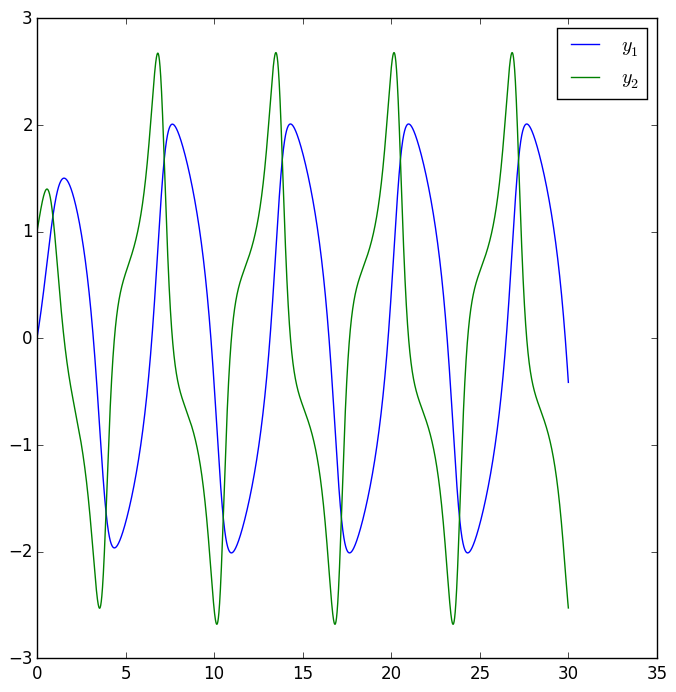

In [5]:
using PyPlot

# Plot y[1,:] and y[2,:] over time:
figure(figsize=(8,8))
plot(ta', ya[1,:], label="\$y_1\$")
plot(ta', ya[2,:], label="\$y_2\$")
legend();

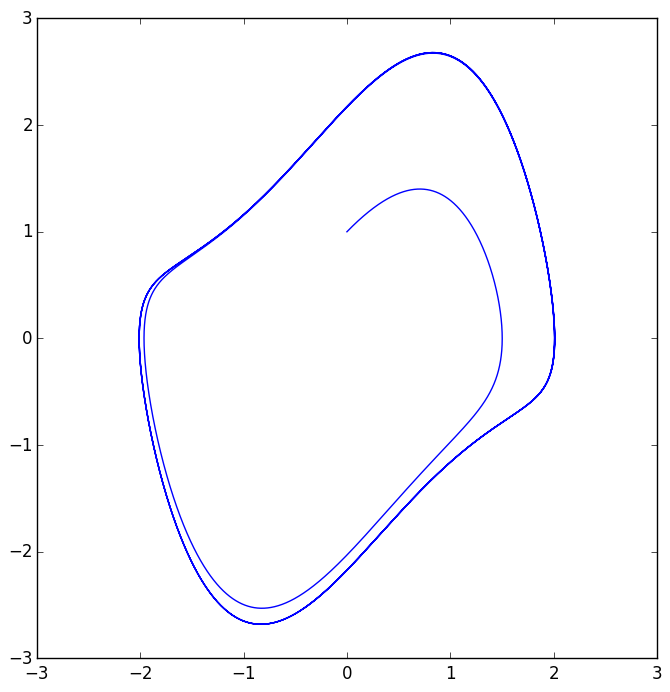

In [6]:
# A phase diagram:
figure(figsize=(8,8))
plot(ya[1,:], ya[2,:]);

In [7]:
#
# Newton's method:
# F  - a vector-valued function
# dF - Jacobian matrix of F
# x0 - a starting vector for the Newton iteration
#
# returns a vector as result
#
function newton(F, dF, x0, precision = 1.e-8)
    x = x0;
    for i = 1:100
        step = - inv(dF(x)) * F(x)
        x = x + step
        if (norm(F(x)) < precision)
            return x
        end
    end
    error("no convergence")
end

newton (generic function with 2 methods)

In [8]:
#
# (implicit) backward Euler scheme:
# f  - rhs of differential equation
# df - Jacobian matrix of f
# t0 - Initial time
# y0 - Initial value
# h  - step length
# T  - right boundary of time interval [t0,T]
#
function backward_euler(f, df, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor(T/h))
    
    t = zeros(1, N + 1)
    y = zeros(d, N + 1)

    # Initial values:
    t[1] = t0
    y[:,1] = y0

    for i = 1:N
        t[i+1] = t[i] + h
        
        G(z) = y[:,i] + h * f(t[i+1], z) - z
        dG(z) = h * df(t[i+1], z) - eye(d)
        y[:,i+1] = newton(G, dG, y[:,i])
    end
    
    return (t, y)
end

backward_euler (generic function with 1 method)

In [9]:
#
# (implicit) trapezoidal-rule, or Crank-Nicolson scheme:
# f  - rhs of differential equation
# df - Jacobian matrix of f
# t0 - Initial time
# y0 - Initial value
# h  - step length
# T  - right boundary of time interval [t0,T]
#
function crank_nicolson(f, df, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor(T/h))
    
    t = zeros(1, N + 1)
    y = zeros(d, N + 1)

    # Initial values:
    t[1] = t0
    y[:,1] = y0

    for i = 1:N
        t[i+1] = t[i] + h
        
        G(z) = y[:,i] + h * 0.5 * (f(t[i+1], z) + f(t[i], y[:,i])) - z
        dG(z) = 0.5 * h * df(t[i+1], z) - eye(d)
        y[:,i+1] = newton(G, dG, y[:,i])
    end
    
    return (t, y)
end

crank_nicolson (generic function with 1 method)

In [10]:
h=0.01
T=30
ta,ya = forward_euler(f, df, t0, y0, h, T);
tb,yb = backward_euler(f, df, t0, y0, h, T);
tc,yc = crank_nicolson(f, df, t0, y0, h, T);

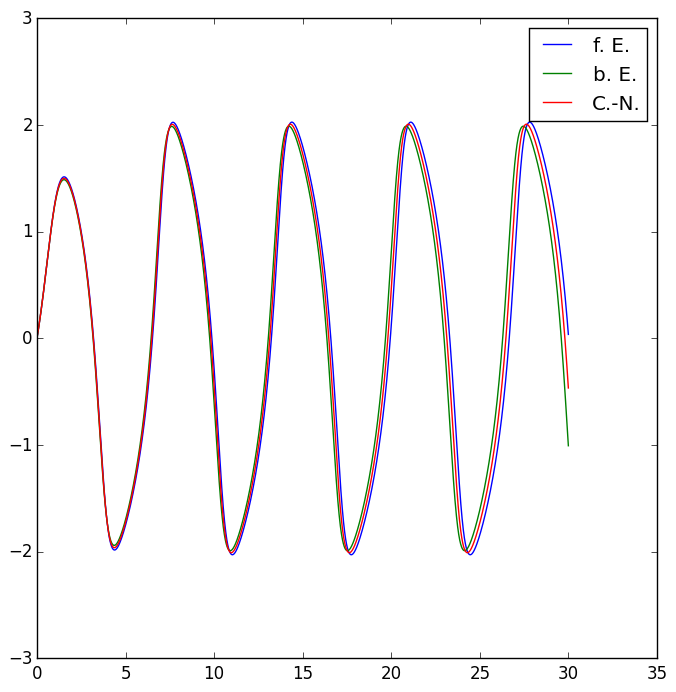

In [11]:
# Plot y[1,:] and y[2,:] over time:
figure(figsize=(8,8))
plot(ta', ya[1,:], label="f. E.")
plot(tb', yb[1,:], label="b. E.")
plot(tc', yc[1,:], label="C.-N.")
legend();

In [12]:
h=0.001
T=100
ta,ya = forward_euler(f, df, t0, y0, h, T);
tb,yb = backward_euler(f, df, t0, y0, h, T);
tc,yc = crank_nicolson(f, df, t0, y0, h, T);

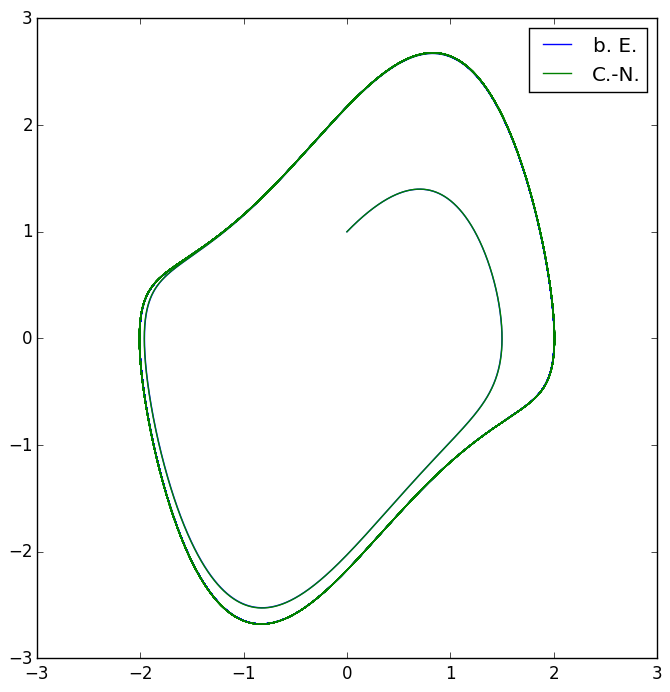

In [13]:
# Plot y[1,:] and y[2,:] over time:
figure(figsize=(8,8))
#plot(ya[1,:], ya[2,:], label="f. E.")
plot(yb[1,:], yb[2,:], label="b. E.")
plot(yc[1,:], yc[2,:], label="C.-N.")
legend();